In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import Pitch, Sbopen, VerticalPitch
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [2]:
parser  = Sbopen()
df, related, freeze, tactics = parser.event(3943043)
freeze ["player_name"].unique()
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'outcome_id', 'outcome_name',
       'under_pressure', 'out', 'counterpress', 'pass_switch',
       'dribble_nutmeg', 'aerial_won', 'pass_cross', 'technique_id',
       'technique_name', 'pass_no_touch', 'foul_won_defensive', 'off_camera',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_one_on_one',
       'shot_statsbomb_xg', 'shot_key_pass_id', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'end_z',

In [3]:
name_replacements = {
    'Daniel Olmo Carvajal': 'Daniel Olmo',
    'Fabián Ruiz Peña': 'Fabián',
    'Lamine Yamal Nasraoui Ebana': 'Lamine Yamal',
    'Álvaro Borja Morata Martín': 'Álvaro Borja Morata',
    'Daniel Carvajal Ramos': 'Daniel Carvajal',
    'Rodrigo Hernández Cascante': 'Rodri',
    'Nicholas Williams Arthuer': 'N.Williams',
    'Marc Cucurella Saseta': 'Marc Cucurella',
    'Robin Aime Robert Le Normand': 'Robin Aime Robert LeNormand',
    'Unai Simón Mendibil': 'Unai Simón',
    'Martín Zubimendi Ibáñez': 'Martín Zubimendi ',
    'Mikel Oyarzabal Ugarte': 'Mikel Oyarzabal ',
    'Mikel Merino Zazón': 'Mikel Merino',
    'José Ignacio Fernández Iglesias': 'José Ignacio Fernández Iglesias'  }



df.replace(name_replacements, inplace=True)
related.replace(name_replacements, inplace=True)
freeze.replace(name_replacements, inplace=True)
tactics.replace(name_replacements, inplace=True)

In [18]:
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Spain"].iloc[0]["index"]
mask_spain = (df.type_name == 'Pass') & (df.team_name == "Spain") & (df.index < sub)  & (df.sub_type_name != "Throw-in")
#print(df.outcome_name)
df_pass = df.loc[mask_spain, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name", "outcome_name"]]
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])
print (df_pass)

         x     y  end_x  end_y player_name pass_recipient_name outcome_name
9      6.9  39.6    9.1   57.2       Simón           LeNormand          NaN
12     8.9  57.2   20.6   75.8   LeNormand            Carvajal          NaN
16    28.6  76.4   50.2   68.5    Carvajal                Olmo          NaN
21    61.9  67.1   65.1   66.9      Morata               Yamal   Incomplete
27    70.4  73.3   71.0   78.3        Olmo            Carvajal          NaN
...    ...   ...    ...    ...         ...                 ...          ...
1689  35.4  24.9  120.0   10.2     Laporte               Yamal          Out
1694  32.7   5.1   42.9    4.0   Cucurella          N.Williams          NaN
1697  42.2   4.5   48.0   62.7  N.Williams               Yamal          NaN
1700  41.6  64.4   57.2   75.1       Yamal            Carvajal          NaN
1702  55.1  76.2   29.2   63.0    Carvajal           LeNormand          NaN

[317 rows x 7 columns]


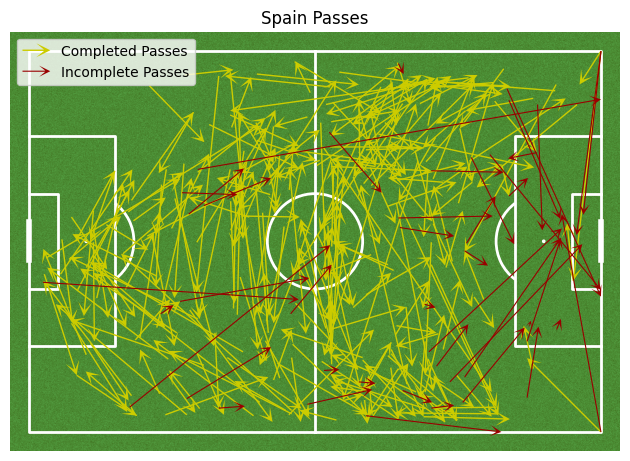

In [19]:
complete_pass_mask = df_pass.outcome_name.isnull()
completed_passes = df_pass[complete_pass_mask]
Incomplete_passes = df_pass[~complete_pass_mask]
    # setup the pitch
pitch = Pitch(pitch_color='grass', line_color='white')
fig, ax = pitch.draw()
    # plot the completed passes arrows
pitch.arrows(
        xstart=completed_passes.x, ystart=completed_passes.y, xend=completed_passes.end_x,
        yend=completed_passes.end_y, width=1, ax=ax, headwidth=10, headlength=10, color='#cccc00',
        label='Completed Passes')
    # plot the Incomplete passes arrows
pitch.arrows(
        xstart=Incomplete_passes.x, ystart=Incomplete_passes.y, xend=Incomplete_passes.end_x,
        yend=Incomplete_passes.end_y, width=0.8, ax=ax, headwidth=10, headlength=10, color='#990000',
        label='Incomplete Passes')
    # set the title
ax.set_title(f'Spain Passes')
    # set the legend
ax.legend(loc='upper left')
plt.show()
